In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
vocab_size=10000

(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=vocab_size)

print("Train samples:", len(x_train))
print("Test samples :", len(x_test))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train samples: 25000
Test samples : 25000


In [9]:
print("First review (as integers):", x_train[0][:30], "...")
print("First label:", y_train[0])  # 1 = positive, 0 = negative

First review (as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480] ...
First label: 1


#Pad sequences to same length

In [10]:
maxlen=200

x_train_pad=pad_sequences(x_train,maxlen=maxlen,padding='pre',truncating='pre')
x_test_pad=pad_sequences(x_test,maxlen=maxlen,padding='pre',truncating='pre')


print('shape of the train',x_train_pad.shape)
print('shape of the test',x_test_pad.shape)

shape of the train (25000, 200)
shape of the test (25000, 200)


#Build the RNN model

In [16]:
embedding_dim = 64   # size of word vector
rnn_units = 64       # number of RNN units

model=keras.Sequential([
    layers.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=vocab_size,
                     output_dim=embedding_dim),
    layers.SimpleRNN(rnn_units),
    layers.Dense(1,activation='sigmoid')  # output: probability of positive sentiment
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,321 (2.47 MB)

 Trainable params: 648,321 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

#Compile the model

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#train the model

In [19]:
from re import VERBOSE
history=model.fit(x_train_pad,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2,   # 20% of training data used as validation
                  verbose=1)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.9983 - loss: 0.0098 - val_accuracy: 0.9970 - val_loss: 0.0097
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9995 - loss: 0.0045 - val_accuracy: 0.9858 - val_loss: 0.0374
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9912 - loss: 0.0266 - val_accuracy: 0.9958 - val_loss: 0.0142
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9964 - val_loss: 0.0116
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 1.0000 - loss: 9.0973e-04 - val_accuracy: 0.9972 - val_loss: 0.0097
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 1.0000 - loss: 5.5869e-04 - val_accuracy: 0.9974 - val_loss: 0.0093
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 1.0000 - loss: 4.1935e-04 - val_accuracy: 0.9968 - val_loss: 0.0097
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 1.00

#Evaluate on the test set

In [20]:
test_loss,test_acc=model.evaluate(x_test_pad,y_test)
print('Test accuracy:',test_acc)
print('test loss ',test_loss)

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8248 - loss: 0.8835
Test accuracy: 0.8249599933624268
test loss  0.8811173439025879


# plot the model

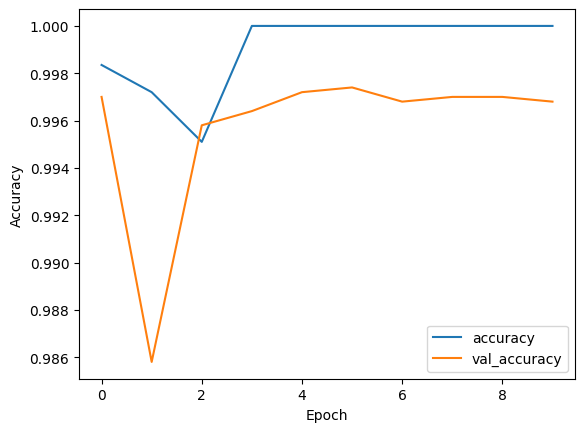

In [21]:
#accuracy
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

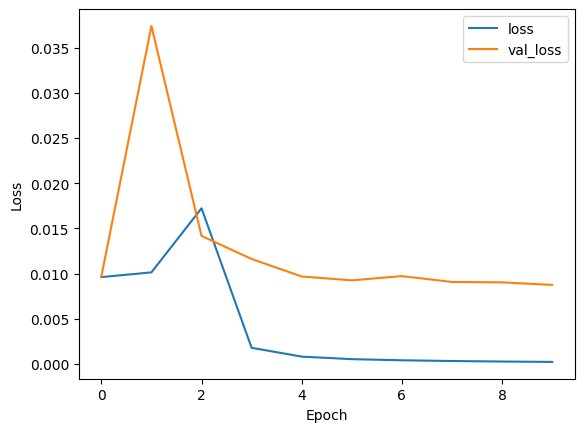

In [22]:
#loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#predict

In [23]:
index=0

review=x_test_pad[index:index+1]
true_label=y_test[index]

pred_prob=model.predict(review)[0][0]
pred_label=1 if pred_prob > 0.5 else 0

print("Predicted prob (positive):", pred_prob)
print("Predicted label:", "positive" if pred_label==1 else "negative")
print("True label     :", "positive" if true_label==1 else "negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Predicted prob (positive): 0.00027972786
Predicted label: negative
True label     : negative


In [26]:
model.save('rnn_model.h5')